In [1]:
using InteractiveUtils
using Interact 	# use interactive HTML binding of variables
using Plots 	# use Plot package to ... plot
using Printf
using WebIO
WebIO.install_jupyter_nbextension()
plotlyjs()

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1317


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3867506593730821776\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2068351010631690839\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3867506593730821776\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Installing Jupyter WebIO extension...
│   cmd = `/Users/jan/opt/anaconda3/bin/jupyter nbextension install --user /Users/jan/.julia/packages/WebIO/Fy9h1/deps/bundles/webio-jupyter-notebook.js`
└ @ WebIO /Users/jan/.julia/packages/WebIO/Fy9h1/deps/jupyter.jl:237
Up to date: /Users/jan/Library/Jupyter/nbextensions/webio-jupyter-notebook.js

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable <the entry point> --user
    
┌ Info: Enabling Jupyter WebIO extension...
│   cmd = `/Users/jan/opt/anaconda3/bin/jupyter nbextension enable --user webio-jupyter-notebook`
└ @ WebIO /Users/jan/.julia/packages/WebIO/Fy9h1/deps/jupyter.jl:241
Enabling notebook extension webio-jupyter-notebook...
      - Validating: OK


Plots.PlotlyJSBackend()

In [2]:
# This Pluto notebook uses @bind for interactivity. When running this notebook outside of Pluto, the following 'mock version' of @bind gives bound variables a default value (instead of an error).
macro bind(def, element)
    quote
        local el = $(esc(element))
        global $(esc(def)) = Core.applicable(Base.get, el) ? Base.get(el) : missing
        el
    end
end

@bind (macro with 1 method)

In [3]:
common_ration(n::Int,ε) = (2.0*(n-2) + 1 - 2ε)/(n*(n-1))

common_ration (generic function with 1 method)

In [4]:
function CEven(n::Int,ε) # define even coefficients
   if n==0
        return 1.0
    elseif n == 1
        return 0.0
    end
    return CEven(n-2,ε) * common_ration(n,ε)
end

CEven (generic function with 1 method)

In [5]:
function COdd(n::Int,ε) # define odd coefficients
    if n==1
        return 1.0
    elseif n == 0
        return 0.0
    end
    return COdd(n-2,ε) * (2.0*(n-2) + 1 - 2ε)/(n*(n-1))
end

COdd (generic function with 1 method)

In [6]:
numberOfTerms = 200

200

In [7]:
ψEven(x, ε) = sum( η -> CEven(η, ε) * x^η, 0:1:numberOfTerms) * exp(-x^2/2)
ψOdd(x, ε)  = sum( η ->  COdd(η, ε) * x^η, 0:1:numberOfTerms) * exp(-x^2/2)

ψOdd (generic function with 1 method)

In [8]:
xPlot = -5:0.01:5

-5.0:0.01:5.0

In [9]:
# @manipulate for  ε in 0.3:0.1:7.6
#     println(ε)
# end

In [10]:
ε = 0.5

0.5

In [11]:
plotlyjs()
plot1 = plot(xPlot, xPlot .^2, label="V(x) = x²")
plot!(plot1, xPlot, ψEven.(xPlot, ε), label="ψ even, ε=$(@sprintf("%.2f",ε))")
ylims!(plot1, (-5,5))
title!(plot1, "Even wavefunctions")

<!DOCTYPE html>
 
 
 Plots.jl

In [12]:
plotlyjs() # change to plotlyJS plotting backend
plot2 = plot(xPlot, xPlot .^2, label="V(x) = x²")
plot!(plot2, xPlot, ψOdd.(xPlot, ε), label="ψ odd, ε=$(@sprintf("%.2f",ε))")
ylims!(plot2, (-5,5))
title!(plot2, "Odd wavefunctions")

<!DOCTYPE html>
 
 
 Plots.jl

┌ Info: Saved animation to 
│   fn = /Users/jan/Documents/PhD/code/quantum-harmonic-oscillator/tmp.gif
└ @ Plots /Users/jan/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/jan/Documents/PhD/code/quantum-harmonic-oscillator/tmp.gif")
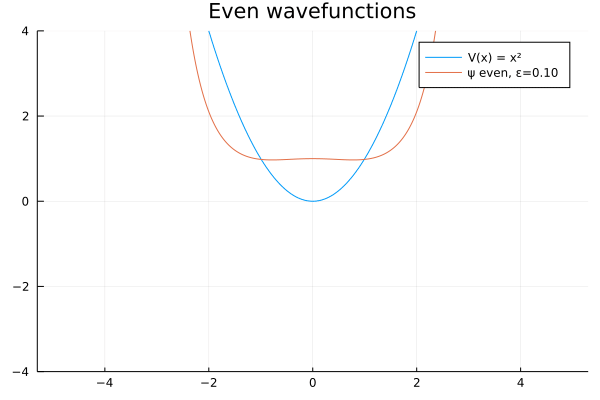

In [13]:
gr()
@gif for ε ∈ 0.1:0.05:10.0
    plot(xPlot, xPlot .^2, label="V(x) = x²")
    ylims!((-4,4))
    title!("Even wavefunctions")
    plot!(xPlot, ψEven.(xPlot, ε), label="ψ even, ε=$(@sprintf("%.2f",ε))")
end

┌ Info: Saved animation to 
│   fn = /Users/jan/Documents/PhD/code/quantum-harmonic-oscillator/tmp.gif
└ @ Plots /Users/jan/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/jan/Documents/PhD/code/quantum-harmonic-oscillator/tmp.gif")
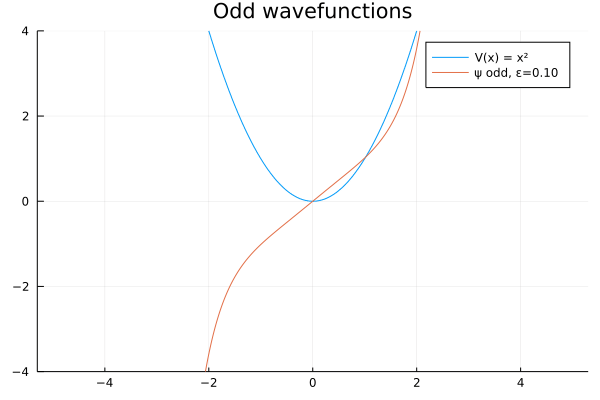

In [15]:
gr()
@gif for ε ∈ 0.1:0.05:10.0
    plot(xPlot, xPlot .^2, label="V(x) = x²")
    ylims!((-4,4))
    title!("Odd wavefunctions")
    plot!(xPlot, ψOdd.(xPlot, ε), label="ψ odd, ε=$(@sprintf("%.2f",ε))")
end